# FER2013

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 32 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=68a2c2ad8681a4ab1c7412f5e6f13d206bc18dcd877bb51936d418acd106b997
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, shutil
#import face_recognition
from sklearn import datasets

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving sss.jpg to sss.jpg


## EDA

In [ ]:
rawData=pd.read_csv('/content/drive/MyDrive/final/data/fer2013.csv')
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
rawData.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
rawData['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)



In [ ]:
rawData['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def showImg_label(x,y):
  x_reshaped=x.reshape(48,48)
  plt.imshow(x_reshaped, cmap='gray', interpolation='nearest') #고해상도 보간법
  plt.axis('off')
  plt.show()
  print(y)

#이미지와 감정상태 가져오기

### 0=Angry

In [ ]:
img=rawData['pixels'][0]
val=img.split(" ")
x_pixels=np.array(val, 'float32')
x_pixels /= 255

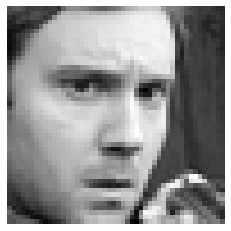

0


In [ ]:
showImg_label(x_pixels, rawData['emotion'][0])

###  1=Disgust

In [ ]:
rawData.loc[rawData['emotion']==1].head(2)

,emotion,pixels,Usage
299,1,126 126 129 120 110 168 174 172 173 174 170 15...,Training
388,1,89 55 24 40 43 48 53 55 59 41 33 31 22 32 42 4...,Training


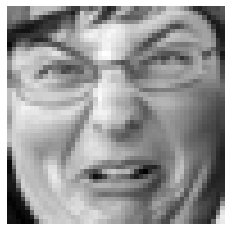

1


In [ ]:
x_pixels=np.array(rawData['pixels'][299].split(" "), 'float32')
x_pixels /= 255
showImg_label(x_pixels, rawData['emotion'][299])

In [ ]:
rawData.index[rawData['emotion']==2].tolist()[0]

2

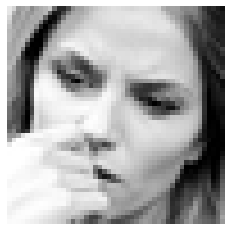

2


In [ ]:
x_pixels=np.array(rawData['pixels'][2].split(" "), 'float32')
x_pixels /= 255
showImg_label(x_pixels, rawData['emotion'][2])

### 3 Happy

In [ ]:
rawData.index[rawData['emotion']==3].tolist()[0]

7

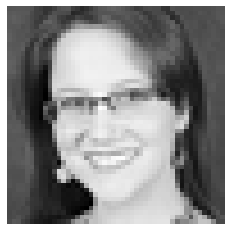

3


In [ ]:
x_pixels=np.array(rawData['pixels'][7].split(" "), 'float32')
x_pixels /= 255
showImg_label(x_pixels, rawData['emotion'][7])

###  4=Sad, 5=Surprise, 6=Neutral

In [ ]:
rawData.index[rawData['emotion']==4].tolist()[0]

3

In [ ]:
rawData.index[rawData['emotion']==5].tolist()[0]

15

In [ ]:
rawData.index[rawData['emotion']==6].tolist()[0]

4

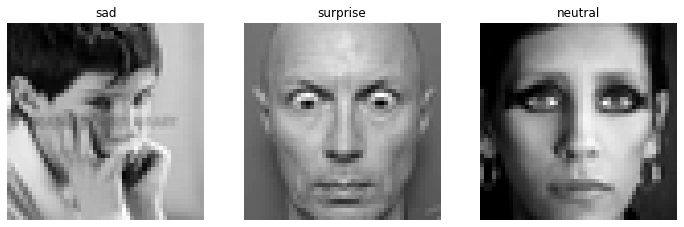

In [ ]:
x_pixels1=np.array(rawData['pixels'][3].split(" "), 'float32')
x_pixels2=np.array(rawData['pixels'][15].split(" "), 'float32')
x_pixels3=np.array(rawData['pixels'][4].split(" "), 'float32')
x_pixels1 /= 255
x_pixels2 /= 255
x_pixels3 /= 255

fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,3, 1)
x_reshaped1=x_pixels1.reshape(48,48)
plt.imshow(x_reshaped1, cmap='gray', interpolation='nearest') 
ax1.set_title('sad')
plt.axis('off')

ax2 = fig.add_subplot(1,3, 2)
x_reshaped2=x_pixels2.reshape(48,48)
plt.imshow(x_reshaped2, cmap='gray', interpolation='nearest') 
ax2.set_title('surprise')
plt.axis('off')

ax3 = fig.add_subplot(1,3,3)
x_reshaped3=x_pixels3.reshape(48,48)
plt.imshow(x_reshaped3, cmap='gray', interpolation='nearest') 
ax3.set_title('neutral')
plt.axis('off')

plt.show()

이 중 우린 행복(3), 슬픔(4)의 데이터만 추출하여 트레이닝

## HAPPY(3)&SAD(4)

In [ ]:
rawData

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
data=rawData.loc[(rawData['emotion']==3) | (rawData['emotion']==4)  ]
data

,emotion,pixels,Usage
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
14,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training
...,...,...,...
35869,3,217 220 222 223 223 224 225 223 223 225 223 22...,PrivateTest
35873,4,54 57 77 122 121 76 73 80 58 22 26 27 35 41 66...,PrivateTest
35878,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest


In [ ]:
data = data.reset_index()
data

,index,emotion,pixels,Usage
0,3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
1,6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
2,7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
3,8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
4,14,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training
...,...,...,...,...
15061,35869,3,217 220 222 223 223 224 225 223 223 225 223 22...,PrivateTest
15062,35873,4,54 57 77 122 121 76 73 80 58 22 26 27 35 41 66...,PrivateTest
15063,35878,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...,PrivateTest
15064,35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest


In [ ]:
data=data.drop(['index'], axis=1)

In [ ]:
pd.DataFrame(data).T.to_csv('/content/drive/MyDrive/data/emotiondata.csv')

# 감정 인식